## Decision Tree Exercises

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [17]:
from __future__ import print_function
import pandas as pd
filepath='C:\IntelPython3\projects\Wine_Quality_Data.csv'
data=pd.read_csv(filepath)

## Answer 1

* Import the data and examine the features.
* We will be using all of them to predict `color` (white or red), but the colors feature will need to be integer encoded.

In [18]:
data['color']=data['color'].transform(lambda x: 1 if x=='red' else 1)

## Answer 2

* Use `StratifiedShuffleSplit` to split data into train and test sets that are stratified by wine quality. If possible, preserve the indices of the split for question 5 below.
* Check the percent composition of each quality level for both the train and test data sets.

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(random_state=0)
X=[i for i in data.columns if i!='color']
X_data=data[X]
Y_data=data['color']
train_indices,test_indices=[],[]
for train_index, test_index in sss.split(X_data, Y_data):
    train_indices.append(train_index)
    test_indices.append(test_index)
    X_train, X_test = X_data.loc[train_index], X_data.loc[test_index]
    y_train, y_test = Y_data[train_index], Y_data[test_index]

In [39]:
X_train.shape[0]/X_data.shape[0]*100,X_test.shape[0]/X_data.shape[0]*100

(89.99538248422348, 10.004617515776513)

## Answer 3

* Fit a decision tree classifier with no set limits on maximum depth, features, or leaves.
* Determine how many nodes are present and what the depth of this (very large) tree is.
* Using this tree, measure the prediction error in the train and test data sets. What do you think is going on here based on the differences in prediction error?

In [44]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier ()
DTC=DTC.fit(X_train,y_train)
DTC.get_depth(),DTC.get_n_leaves()

(0, 1)

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

def error(ytrue,ypred):
    ErrorDF=pd.Series({
    'accuracy': accuracy_score(ytrue,ypred),
    'precision':precision_score(ytrue,ypred),
    'recall':recall_score(ytrue,ypred),
    'f1'  :f1_score(ytrue,ypred),
    })
    return ErrorDF
    

In [73]:
ytrainpred=DTC.predict(X_train)
ytestpred=DTC.predict(X_test)
print(error(y_test,ytestpred),'test')
print(error(y_train,ytrainpred),'train')

accuracy     1.0
precision    1.0
recall       1.0
f1           1.0
dtype: float64 test
accuracy     1.0
precision    1.0
recall       1.0
f1           1.0
dtype: float64 train


In [71]:
DTC.tree_.node_count,DTC.tree_.max_depth

(1, 0)

## Answer 4

* Using grid search with cross validation, find a decision tree that performs well on the test data set. Use a different variable name for this decision tree model than in question 3 so that both can be used in question 6.
* Determine the number of nodes and the depth of this tree.
* Measure the errors on the training and test sets as before and compare them to those from the tree in question 3.

In [93]:
from sklearn.model_selection import GridSearchCV
estimator=DecisionTreeClassifier()
parameters={'criterion':['gini', 'entropy'],'splitter':('best', 'random'),'max_depth':[1,2],'min_samples_split':[2],'max_features':['auto', 'sqrt', 'log2']}
gs=GridSearchCV(estimator,parameters)
gs=gs.fit(X_train,y_train)

In [108]:
gs.best_estimator_,gs.best_params_,gs.best_estimator_.tree_.max_depth

(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 {'criterion': 'gini',
  'max_depth': 1,
  'max_features': 'auto',
  'min_samples_split': 2,
  'splitter': 'best'},
 0)

In [115]:
ytrainp=gs.predict(X_train)
ytestp=gs.predict(X_test)

compareerror=pd.concat([error(y_train,ytrainp),error(y_test,ytestp)],axis=1)

## Answer 5

* Re-split the data into `X` and `y` parts, this time with `residual_sugar` being the predicted (`y`) data. *Note:* if the indices were preserved from the `StratifiedShuffleSplit` output in question 2, they can be used again to split the data.
* Using grid search with cross validation, find a decision tree **regression** model that performs well on the test data set.
* Measure the errors on the training and test sets using mean squared error.
* Make a plot of actual *vs* predicted residual sugar.

In [123]:
feature_cols=[i for i in data.columns if i!='residual_sugar']
for i in zip(train_indices,test_indices):
    X_train = data.loc[i[0], feature_cols]
    y_train = data.loc[i[0], 'residual_sugar']

    X_test = data.loc[i[1], feature_cols]
    y_test = data.loc[i[1], 'residual_sugar']

In [124]:
from sklearn.tree import DecisionTreeRegressor
Dr=DecisionTreeRegressor ()
Dr=Dr.fit(X_train,y_train)
Dr.get_depth(),Dr.get_n_leaves()

(30, 4002)

In [131]:
estimator=DecisionTreeRegressor()
parameters={'criterion':['mse', 'friedman_mse', 'mae'],'splitter':('best', 'random'),'max_depth':[1,2],'min_samples_split':[2],'max_features':['auto', 'sqrt', 'log2']}
gsr=GridSearchCV(estimator,parameters)
gsr=gsr.fit(X_train,y_train)

In [136]:
from sklearn.metrics import mean_squared_error

ytrainr=gsr.predict(X_train)
ytestr=gsr.predict(X_test)


compareerrorreg=pd.Series({'train_mean':mean_squared_error(y_train,ytrainr),
                           'test_mean':mean_squared_error(y_test,ytestr)})


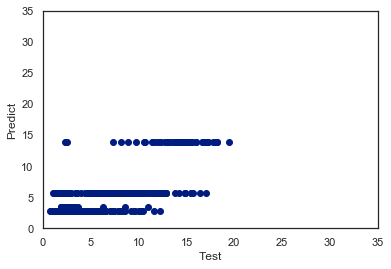

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')


ax=plt.axes()
ax.plot(y_test,ytestr,marker='o',ls='')
ax.set(xlabel='Test', ylabel='Predict', xlim=(0,35), ylim=(0,35));

## Answer 6 *(Optional)*

This question is optional as it requires an additional command line program (GraphViz) and Python library (PyDotPlus). GraphViz can be installed with a package manager on Linux and Mac. For PyDotPlus, either `pip` or `conda` (`conda install -c conda-forge pydotplus`) can be used to install the library.

Once these programs are installed:

* Create a visualization of the decision tree from question 3, where wine color was predicted and the number of features and/or splits are not limited.
* Create a visualization of the decision tree from question 4, where wine color was predicted but a grid search was used to find the optimal depth and number of features.

The decision tree from question 5 will likely have too many nodes to visualize.

## Answer 7
* Import the iris data and examine the features.
* We will be using all of them to predict species, but the species feature will need to be integer encoded.

In [152]:
filepat='C:\IntelPython3\projects\Iris_Data.csv'
irisdata=pd.read_csv(filepat)

In [157]:
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()
irisdata['species']=lenc.fit_transform(irisdata['species'])

## Answer 8

* Use `StratifiedShuffleSplit` to split data into train and test sets that are stratified by species. If possible, preserve the indices of the split for question 11 below.
* Check the percent composition of each species level for both the train and test data sets.

In [160]:
ss=StratifiedShuffleSplit(random_state=0)
X=[i for i in irisdata.columns if i!='species']
X_dt=irisdata[X]
Y_dt=irisdata['species']
trainidx,testidx=[],[]
for train_idx,test_idx in ss.split(X_dt,Y_dt):
    trainidx.append(train_idx),testidx.append(test_idx)
    X_train,X_test=X_dt.loc[train_idx],X_dt.loc[test_idx]
    Y_train,Y_test=Y_dt.loc[train_idx],Y_dt.loc[test_idx]


In [163]:
X_train.shape[0]/X_dt.shape[0]*100,X_test.shape[0]/X_dt.shape[0]*100

(90.0, 10.0)

## Answer 9

* Fit a decision tree classifier with no set limits on maximum depth, features, or leaves.
* Determine how many nodes are present and what the depth of this (very large) tree is.
* Using this tree, measure the prediction error in the train and test iris_data sets. What do you think is going on here based on the differences in prediction error?

In [165]:
Dtc=DecisionTreeClassifier ()
Dtc=Dtc.fit(X_train,Y_train)
Dtc.get_depth(),Dtc.get_n_leaves()

(5, 9)

In [193]:
ytrainprediris=Dtc.predict(X_train)
ytestprediris=Dtc.predict(X_test)
e=error(Y_test,ytestprediris)
e1=error(Y_train,ytrainprediris)
Error=pd.DataFrame({'train_error without parms':e1,'test_error without parms':e})
Error.reset_index()

,index,train_error without parms,test_error without parms
0,accuracy,1.0,1.0
1,precision,1.0,1.0
2,recall,1.0,1.0
3,f1,1.0,1.0


## Answer 10

* Using grid search with cross validation, find a decision tree that performs well on the test iris_data set. Use a different variable name for this decision tree model than in question 9 so that both can be used in question 12.
* Determine the number of nodes and the depth of this tree.
* Measure the errors on the training and test sets as before and compare them to those from the tree in question 9.

In [194]:
from sklearn.model_selection import GridSearchCV
estimator=DecisionTreeClassifier()
parameters={'criterion':['gini', 'entropy'],'splitter':('best', 'random'),'max_depth':[1,2],'min_samples_split':[2],'max_features':['auto', 'sqrt', 'log2']}
gsiris=GridSearchCV(estimator,parameters)
gsiris=gsiris.fit(X_train,Y_train)

In [195]:
gsiris.best_estimator_.get_depth(),gsiris.best_estimator_.get_n_leaves()

(2, 3)

In [198]:
ytrainpredirisp=gsiris.predict(X_train)
ytestpredirisp=gsiris.predict(X_test)
e3=error(Y_test,ytestpredirisp)
e4=error(Y_train,ytrainpredirisp)
Errorp=pd.DataFrame({'train_error with parms':e4,'test_error withparms':e3})
Errorp.reset_index()
pd.concat([Error,Errorp],axis=1)

,train_error without parms,test_error without parms,train_error with parms,test_error withparms
accuracy,1.0,1.0,0.955556,1.0
precision,1.0,1.0,0.957856,1.0
recall,1.0,1.0,0.955556,1.0
f1,1.0,1.0,0.955468,1.0


# Answer 11

* Re-split the iris_data into `X` and `y` parts, this time with `species` being the predicted (`y`) iris_data. *Note:* if the indices were preserved from the `StratifiedShuffleSplit` output in question 8, they can be used again to split the iris_data.
* Using grid search with cross validation, find a decision tree **regression** model that performs well on the test iris_data set.
* Measure the errors on the training and test sets using mean squared error.
* Make a plot of actual *vs* predicted species.

In [199]:
feature_cols=[i for i in irisdata.columns if i!='species']
for i in zip(trainidx,testidx):
    X_train = irisdata.loc[i[0], feature_cols]
    y_train = irisdata.loc[i[0], 'species']

    X_test = irisdata.loc[i[1], feature_cols]
    y_test = irisdata.loc[i[1], 'species']

In [200]:
estimator=DecisionTreeRegressor()
parameters={'criterion':['mse', 'friedman_mse', 'mae'],'splitter':('best', 'random'),'max_depth':[1,2],'min_samples_split':[2],'max_features':['auto', 'sqrt', 'log2']}
gsriris=GridSearchCV(estimator,parameters)
gsriris=gsriris.fit(X_train,y_train)

In [202]:

ytrainr=gsriris.predict(X_train)
ytestr=gsriris.predict(X_test)


compareerrorreg=pd.Series({'train_mean':mean_squared_error(y_train,ytrainr),
                           'test_mean':mean_squared_error(y_test,ytestr)})


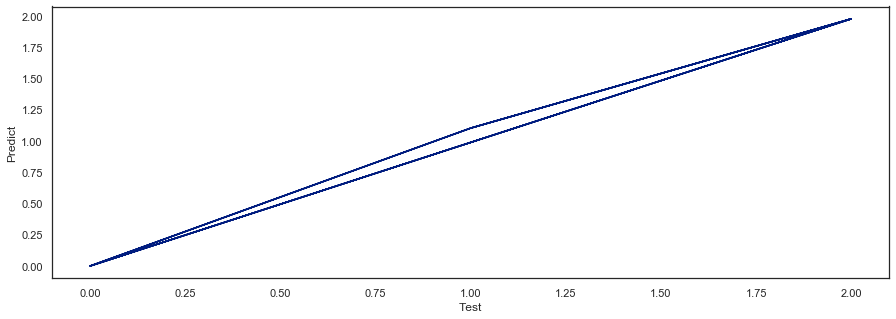

In [212]:

sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')
fig,axes=plt.figure(figsize=(15,5)),plt.axes()
axes.plot(y_test,ytestr)
axes.set(xlabel='Test', ylabel='Predict' );

## Answer 12 *(Optional)*

This question is optional as it requires an additional command line program (GraphViz) and Python library (PyDotPlus). GraphViz can be installed with a package manager on Linux and Mac. For PyDotPlus, either `pip` or `conda` (`conda install -c conda-forge pydotplus`) can be used to install the library.

Once these programs are installed:

* Create a visualization of the decision tree from question 9, where wine species was predicted and the number of features and/or splits are not limited.
* Create a visualization of the decision tree from question 10, where wine species was predicted but a grid search was used to find the optimal depth and number of features.

The decision tree from question 11 will likely have too many nodes to visualize.